### 究竟有哪些因素会对生还率产生影响了?

我的思考:

1.我猜测年轻者年富力强，而年纪大者可能行动不便，这是否会导致年轻者比年纪大者的生还率更高? （需要排除掉儿童）

2.男性和女性谁的生还率比较高?
  --维基百科资料显示:泰坦尼克在使用救生艇的时候有下达命令让妇孺先上艇，会不会导致女性以及儿童生还者率较高？

3.是一个人出行,还是有朋友/家人陪伴? 这个因素是否会影响到乘客的生还率?

4.plcass+sex：联合两个数据调查，查看一下男性在1，2，3等舱各自的生还率， 以及女性在1，2，3等舱各自的生还率.

下面我们一步步来探索一下吧! let go!

### 首先把数据加载进来,看看它的样子

In [182]:
# -*- coding: UTF-8 -*-
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
passenger_list = read_csv('p4-titanic-data.csv')

import numpy as np
import pandas as pd

# ----- The second submission -----
# 返回的是pandas.dataframe
# 这样可以在后面的调查中使用上DataFrame的各种Built-in function,而不用总是使用list
passenger_df = pd.read_csv('p4-titanic-data.csv')

# print type(passenger_list)
print type(passenger_df)
print passenger_df.head()

# print passenger_df['Age'][0]
# print type(passenger_df['Age'][0])


<class 'pandas.core.frame.DataFrame'>
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

### 为了方便后续的计算,修正一下数据类型

In [183]:
from datetime import datetime as dt
from decimal import Decimal

# convert string to int or None
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
# convert string to float or None
def parse_maybe_float(f):
    if f == '' or f == None:
        return None
    else:
        return float(f)
    
for p in passenger_list:
    p['PassengerId'] = parse_maybe_int(p['PassengerId'])
    p['Survived'] = parse_maybe_int(p['Survived'])
    p['Pclass'] = parse_maybe_int(p['Pclass'])
    p['Age'] = parse_maybe_float(p['Age'])
    p['SibSp'] = parse_maybe_int(p['SibSp'])
    p['Parch'] = parse_maybe_int(p['Parch'])
    p['Fare'] = parse_maybe_float(p['Fare'])
        
print passenger_list[0]

{u'Fare': 7.25, u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': 22.0, u'Parch': 0, u'Pclass': 3, u'Sex': u'male', u'Survived': 0, u'SibSp': 1, u'PassengerId': 1, u'Ticket': u'A/5 21171', u'Cabin': u''}


### 验证一下数据的合理性

In [142]:
#统计某一个列数据去重后的数量
# def count_csv(csv_list, col_name):
#     dict_data = {}
#     for r in csv_list:
#         dict_data[r[col_name]] = 0
#     return len(csv_list),len(dict_data),len(csv_list)-len(dict_data)

# distinct_name_result = count_csv(passenger_list, 'Name')
# distinct_ticket_result = count_csv(passenger_list, 'Ticket')

# ----- The second submission -----
# df.duplicated() 返回一个布尔型Series,表示各行是否重复行
# df.drop_duplicates方法，它用于返回一个移除了重复行的DataFrame
# 指定部分列使用drop_duplicates(['XXX'])
def count_csv(df, col_name):
    non_duplicate_df = df.drop_duplicates([col_name])    
    return len(df),len(non_duplicate_df),len(df)-len(non_duplicate_df)

distinct_name_result = count_csv(passenger_df, 'Name')
distinct_ticket_result = count_csv(passenger_df, 'Ticket')

print 'Name - 总数:',distinct_name_result[0], '; 去重后的数量:',distinct_name_result[1], '; 相差:',distinct_name_result[2]
print 'Ticket - 总数:',distinct_ticket_result[0], '; 去重后的数量:',distinct_ticket_result[1], '; 相差:',distinct_ticket_result[2]

Name - 总数: 891 ; 去重后的数量: 891 ; 相差: 0
Ticket - 总数: 891 ; 去重后的数量: 681 ; 相差: 210


In [184]:
#计算某一列数据是否有缺失
def count_missing(csv_list, col_name):
#     #1
#     total_count = 0    
#     for r in csv_list:
#         if r[col_name] != None and r[col_name] != '':
#             total_count += 1
#     return len(csv_list), total_count

    #2
    a = [1 if r[col_name] != None and r[col_name] != '' else 0 for r in csv_list]    
    return len(csv_list), sum(a),len(csv_list)-sum(a),(len(csv_list)-sum(a))*1.0/len(csv_list)

count_missing_age = count_missing(passenger_list, 'Age')
count_missing_ticket = count_missing(passenger_list, 'Ticket')
count_missing_cabin = count_missing(passenger_list, 'Cabin')
count_missing_sibsp = count_missing(passenger_list, 'SibSp')
count_missing_parch = count_missing(passenger_list, 'Parch')


print 'Age - 总数:',count_missing_age[0],';去除空缺数据后:',count_missing_age[1],';缺失',count_missing_age[2],';缺失比例:',count_missing_age[3]
print 'Ticket - 总数:',count_missing_ticket[0],';去除空缺数据后:',count_missing_ticket[1],';缺失',count_missing_ticket[2],';缺失比例:',count_missing_ticket[3]
print 'Cabin - 总数:',count_missing_cabin[0],';去除空缺数据后:',count_missing_cabin[1],';缺失',count_missing_cabin[2],';缺失比例:',count_missing_cabin[3]
print 'SibSp - 总数:',count_missing_sibsp[0],';去除空缺数据后:',count_missing_sibsp[1],';缺失',count_missing_sibsp[2],';缺失比例:',count_missing_sibsp[3]
print 'Parch - 总数:',count_missing_parch[0],';去除空缺数据后:',count_missing_parch[1],';缺失',count_missing_parch[2],';缺失比例:',count_missing_parch[3]

print '----- The second submission -----'
# ----- The second submission -----
# 使用info()即可查看 DataFrame overview information
print passenger_df.info() 

Age - 总数: 891 ;去除空缺数据后: 714 ;缺失 177 ;缺失比例: 0.198653198653
Ticket - 总数: 891 ;去除空缺数据后: 891 ;缺失 0 ;缺失比例: 0.0
Cabin - 总数: 891 ;去除空缺数据后: 204 ;缺失 687 ;缺失比例: 0.771043771044
SibSp - 总数: 891 ;去除空缺数据后: 891 ;缺失 0 ;缺失比例: 0.0
Parch - 总数: 891 ;去除空缺数据后: 891 ;缺失 0 ;缺失比例: 0.0
----- The second submission -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


数据合理性小结:

1).并没有重复乘客的数据.

2).有重复的Ticket,说明有一张票多人使用的情况存在.

3).有177条数据缺失年龄信息,约占总数19.87%.

4).有687条数据缺失舱室信息,约占总数77.10%




### 数据探索

#### 首先调查一下年龄和生还率之间的关系

为了方便后面根据Age分析数据,需要生成一个新的数据集 -> 即去除没有Age信息后的的数据集合.

In [185]:
#去除信息缺失的数据
# def remove_missing(csv_list, col_name):
#     result_list = []
#     [result_list.append(r) if r[col_name] != None and r[col_name] != '' else 0  for r in csv_list]
#     return result_list
    
# #去除没有Age信息后的的数据集合
# age_complete_data = remove_missing(passenger_list, 'Age')
# print len(age_complete_data)

# ----- The second submission -----
# 去除缺失数据使用dropna()
# 指定根据某一列删除缺失数据,使用subset
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
def remove_missing(df, col_name):    
    return df.dropna(subset=[col_name])

age_df = remove_missing(passenger_df, 'Age')
print len(age_df)

714


----- UnSurvived * Age * Blue color-----
Mean: 30.6261792453
Standard deviation: 14.1553876178
Minimum: 1.0
Maximum: 74.0
----- Survived * Age * Green color-----
Mean: 28.3436896552
Standard deviation: 14.9251522203
Minimum: 0.42
Maximum: 80.0


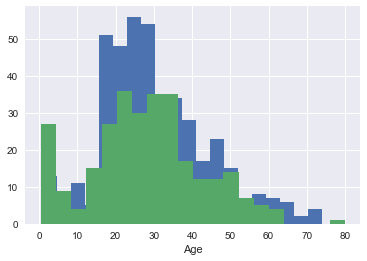

In [186]:
# # 输出数据的基本统计信息
# # data为list
# def describe_data(data):
#     print 'Mean:', np.mean(data)
#     print 'Standard deviation:', np.std(data)
#     print 'Minimum:', np.min(data)
#     print 'Maximum:', np.max(data)

# # 构造一个年龄的DataFrame
# age_df = pd.DataFrame({
#     'Survived':[r['Survived'] for r in age_complete_data],
#     'Age':[r['Age'] for r in age_complete_data]
# })

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色

# 输出数据的基本统计信息,以及图形
# data为list
def describe_data_with_chat(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.title("")
    plt.xlabel("Age")
    plt.hist(data, bins=20)

survived_age_list = age_df['Age'][age_df['Survived']==1]
unsurvived_age_list = age_df['Age'][age_df['Survived']==0]

print '----- UnSurvived * Age * Blue color-----'
describe_data_with_chat(unsurvived_age_list)
print '----- Survived * Age * Green color-----'
describe_data_with_chat(survived_age_list)

从上面根据年龄分析的数据来看，发现生还和未生还的乘客，他们的年龄主要集中在15-30岁之间，但并不能说明什么问题，可能只是15-30这个年龄段的乘客人数最多，因此需要先统计各个年龄段的总人数，然后计算该年龄段的生还者和未生还者在该年龄段所占的比例。

In [146]:
# # 计算某一个年龄段的生还人数在该年龄段所占百分比, 以及该年龄段生还人数占总生还人数的百分比
# # 年龄段按offset划分offset=10, 表示0-10, 11-20
# def survived_per_to_age(age, offset):
#     age_section = age_df['Survived'][(age_df['Age']>age-offset) & (age_df['Age']<=age)]
#     if len(age_section)>0:
#         return round(sum(age_section)*1.0/len(age_section),4), \
#                 round(sum(age_section)*1.0/len(survived_age_list),4),\
#                 sum(age_section),\
#                 len(age_section)
#     else:
#         return 0,0,0,0

# def describe_survived_per_to_age(start, offset):
#     percent_list = [] #生还者在该年龄段所在百分比
#     section_list = [] #该年龄段 age=10表示0-10, age=20表示11-20
#     for i in range(start,20):
#         age_section_result = survived_per_to_age(i*offset, offset)
#         if age_section_result[0] > 0:
#             section_list.append(i*offset)
#             percent_list.append(age_section_result[0])
#             print i*offset-offset,'-',i*offset, '岁生还乘客在该年龄段所占百分比(%):', age_section_result[0]*100 , \
#                     ';占总生还乘客的百分比(%):', age_section_result[1]*100,\
#                     ';该年龄段乘客生还人数:', age_section_result[2],\
#                     ';该年龄段乘客总人数:', age_section_result[3]
#     return percent_list,section_list

# percent_list_10, section_list_10 = describe_survived_per_to_age(1,10)


# ----- The second submission -----
# 使用pandas的cut
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
def survived_per_to_age(start,offset):
    bins = np.arange(start,90,offset) # 先构造一个用于分组的区间
    passenger_df['Age_section'] = pd.cut(passenger_df['Age'],bins) # 新创建一列来存储分组后的数据
    # 该区间的总人数,返回的是一个Series
    total_passenger_section_sr = passenger_df.groupby(['Age_section']).count()['PassengerId'] 
    
    # 该区间的生还人数,返回的是一个Series
    survived_passenger_section_sr = passenger_df.groupby(['Age_section']).sum()['Survived']
    
    # 该区间的生还人数占该区间人数的百分比,返回的是一个Series
#     percent_section_sr = survived_passenger_section_sr / total_passenger_section_sr
    #各个组的存活率也可以使用groupby结合mean来得到。这里因为survived变量的值为0/1，所以我们直接对其求平均值就能够得到存活率。
    percent_section_sr = passenger_df.groupby(['Age_section']).mean()['Survived']
    
    # 该区间的生还人数占该总人数的百分比,返回的是一个Series
    total_survived_count = len(age_df[age_df['Survived']==1])
    percent_total_sr = survived_passenger_section_sr / total_survived_count
    
    print '各个年龄区间(offset=',offset,')的生还人数在该区间所占比例(%)'
    print percent_section_sr * 100
    
    print '各个年龄区间(offset=',offset,')的生还人数占总生还人数的比例(%)'
    print percent_total_sr * 100
    
    return percent_section_sr
    
age_offset_10_series = survived_per_to_age(0,10)
    
    

各个年龄区间(offset= 10 )的生还人数在该区间所占比例(%)
Age_section
(0, 10]     59.375000
(10, 20]    38.260870
(20, 30]    36.521739
(30, 40]    44.516129
(40, 50]    38.372093
(50, 60]    40.476190
(60, 70]    23.529412
(70, 80]    20.000000
Name: Survived, dtype: float64
各个年龄区间(offset= 10 )的生还人数占总生还人数的比例(%)
Age_section
(0, 10]     13.103448
(10, 20]    15.172414
(20, 30]    28.965517
(30, 40]    23.793103
(40, 50]    11.379310
(50, 60]     5.862069
(60, 70]     1.379310
(70, 80]     0.344828
Name: Survived, dtype: float64


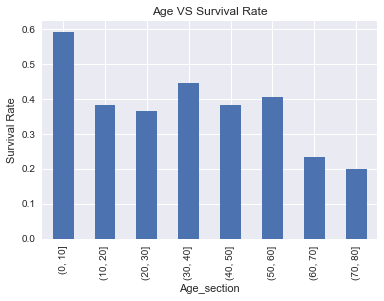

In [187]:
# age_series = pd.Series(percent_list_10, index=section_list_10)
# age_series.plot()

# ----- The second submission -----
age_offset_10_series.plot(kind='bar')
plt.title('Age VS Survival Rate')
plt.ylabel('Survival Rate')

从上面可以看到两个特征:

1.年龄和生还率的关系是随着年龄的增加,生还率逐渐降低;真是这样吗,先记录一个问号?

2.还看到小于10岁的儿童们在他们这个年龄段生还率很高,所以可以推断当时确实有妇孺先上艇的命令下达;我们可以把age扩展至14岁(国际上通常把儿童定义为0-14岁)再次验证一下:

In [188]:
# 统计一下0-14岁的儿童这个年龄段的生还乘客在该年龄段所占百分比,以及占总生还乘客的百分比
def survived_per_to_child():
    age_section = age_df['Survived'][(age_df['Age']>0) & (age_df['Age']<=14)]
    if len(age_section)>0:
        return round(sum(age_section)*1.0/len(age_section),4), \
                round(sum(age_section)*1.0/len(survived_age_list),4),\
                sum(age_section),\
                len(age_section)
    else:
        return 0,0,0,0
# print survived_per_to_child()
print '0-14岁儿童中生还乘客在该年龄段所占百分比(%):', survived_per_to_child()[0]*100 , \
                ';占总生还乘客的百分比(%):', survived_per_to_child()[1]*100,\
                ';该年龄段乘客生还人数:', survived_per_to_child()[2],\
                ';该年龄段乘客总人数:', survived_per_to_child()[3]

0-14岁儿童中生还乘客在该年龄段所占百分比(%): 58.44 ;占总生还乘客的百分比(%): 15.52 ;该年龄段乘客生还人数: 45 ;该年龄段乘客总人数: 77


为了更加严谨的调查 "年轻者年富力强，而年纪大者可能行动不便，是否会导致年轻者比年纪大者的生还率更高? " 这个问题(也即上面提到的年龄和生还率的关系是随着年龄的增加,生还率逐渐降低这个疑问),我们把0-14岁的儿童数据去除,只比较年龄在14岁以上的数据,然后绘制随年龄增加的生化率趋势图,发现并不存在年轻人生还率高的情况. 如下所示:

In [189]:
# 利用上面的函数,从15岁开始统计, 每间隔5岁作为一个统计区间
# percent_list_5, section_list_5 = describe_survived_per_to_age(4,5)

# ----- The second submission -----
age_offset_5_series = survived_per_to_age(15,5)

各个年龄区间(offset= 5 )的生还人数在该区间所占比例(%)
Age_section
(15, 20]     34.375000
(20, 25]     34.426230
(25, 30]     38.888889
(30, 35]     46.590909
(35, 40]     41.791045
(40, 45]     36.170213
(45, 50]     41.025641
(50, 55]     41.666667
(55, 60]     38.888889
(60, 65]     28.571429
(65, 70]      0.000000
(70, 75]      0.000000
(75, 80]    100.000000
(80, 85]           NaN
Name: Survived, dtype: float64
各个年龄区间(offset= 5 )的生还人数占总生还人数的比例(%)
Age_section
(15, 20]    11.379310
(20, 25]    14.482759
(25, 30]    14.482759
(30, 35]    14.137931
(35, 40]     9.655172
(40, 45]     5.862069
(45, 50]     5.517241
(50, 55]     3.448276
(55, 60]     2.413793
(60, 65]     1.379310
(65, 70]     0.000000
(70, 75]     0.000000
(75, 80]     0.344828
(80, 85]          NaN
Name: Survived, dtype: float64


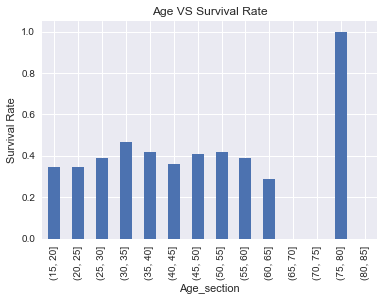

In [190]:
# age_series = pd.Series(percent_list_5, index=section_list_5)
# age_series.plot()

# ----- The second submission -----
age_offset_5_series.plot(kind='bar')
plt.title('Age VS Survival Rate')
plt.ylabel('Survival Rate')

年龄数据分析小结:

1.乘客年龄分布主要集中在15-30岁.

2.分析各自年龄段的生还率,发现儿童这个年龄层的生还率较高,0-14岁儿童总人数77人,45人生还,生还率接近60%,可以推断当时很可能有妇孺先上艇的命令下达.(稍后会再次根据性别验证一下数据)

3."年轻者年富力强，而年纪大者可能行动不便，这些是否会导致年轻者比年纪大者的生还率更高? " -- 调查后发现数据并不支持此种说法.

#### 下面调查一下性别和生还率之间有什么关系

In [191]:
# # 构造一个性别的DataFrame
# sex_df = pd.DataFrame({
#     'Survived':[r['Survived'] for r in passenger_list],
#     'Sex':[r['Sex'] for r in passenger_list]
# })

# 针对某一因素(例如Sex),分别计算它的生还数据(例如男性和女性)
# return 总乘客数, 属于该factor_value的总乘客数, 属于该factor_value的生还乘客数,该factor_value的生还率
def survived_per_to_factor(df,factor,factor_value):
    total_passenger = len(df)
    total_passenger_factor = len(df[df[factor] == factor_value])
    total_passenger_factor_survived = sum(df[df[factor] == factor_value]['Survived'])
    per_to_factor = total_passenger_factor_survived * 1.0 /total_passenger_factor
    return total_passenger, total_passenger_factor, total_passenger_factor_survived, per_to_factor

# male_result = survived_per_to_factor(sex_df, 'Sex', 'male')
# female_result = survived_per_to_factor(sex_df, 'Sex', 'female')

# ----- The second submission -----
male_result = survived_per_to_factor(passenger_df, 'Sex', 'male')
female_result = survived_per_to_factor(passenger_df, 'Sex', 'female')

print '男性乘客人数:',male_result[1],';其中生还人数:',male_result[2],';生还率(%)',round(male_result[3]*100,2)
print '女性乘客人数:',female_result[1],';其中生还人数:',female_result[2],';生还率(%)',round(female_result[3]*100,2)

男性乘客人数: 577 ;其中生还人数: 109 ;生还率(%) 18.89
女性乘客人数: 314 ;其中生还人数: 233 ;生还率(%) 74.2


<Container object of 2 artists>

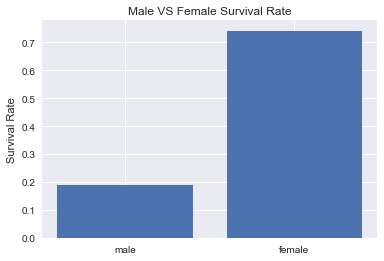

In [203]:
# sex_series = pd.Series([male_result[3]*100,female_result[3]*100], index=['male', 'female'])
# sex_series.plot()
percent_data_by_sex = [male_result[3],female_result[3]]
labels_sex = ['male', 'female']
plt.title('Male VS Female Survival Rate')
plt.ylabel('Survival Rate')
plt.bar(range(len(percent_data_by_sex)), percent_data_by_sex, tick_label=labels_sex)

性别数据分析小结:

1.生还者中女性多于男性,总共生还人数342人,女性233人,占总生还人数的68%

2.男性乘客的生还率远远低于女性,总共577名男性乘客,只有109人生还,生还率只有18.89%

3.可以推断当时非常有可能是下达了妇孺先上艇的命令.

#### 接下来调查一下是否有人亲人陪伴这个因素和生还率之间的关系

In [204]:
# 构造一个是否有人陪伴数据的DataFrame
# lonely_df = pd.DataFrame({
#     'Survived': [r['Survived'] for r in passenger_list],
#     'IsLonely':[True if (r['SibSp'] + r['Parch']) ==0 else False for r in passenger_list]
# })

# ----- The second submission -----
# 修改为直接在passenger_df中新添加新的一列IsLonely
passenger_df['IsLonely'] = (passenger_df['SibSp'] + passenger_df['Parch']) == 0
print passenger_df['IsLonely'].head()

0    False
1    False
2     True
3    False
4     True
Name: IsLonely, dtype: bool


In [205]:
lonely_result = survived_per_to_factor(passenger_df, 'IsLonely', True)
not_lonely_result = survived_per_to_factor(passenger_df, 'IsLonely', False)

In [206]:
print '无人陪伴的乘客人数:',lonely_result[1],';其中生还人数:',lonely_result[2],';生还率(%)',round(lonely_result[3]*100,2)
print '有人陪伴的乘客人数:',not_lonely_result[1],';其中生还人数:',not_lonely_result[2],';生还率(%)',round(not_lonely_result[3]*100,2)

无人陪伴的乘客人数: 537 ;其中生还人数: 163 ;生还率(%) 30.35
有人陪伴的乘客人数: 354 ;其中生还人数: 179 ;生还率(%) 50.56


<Container object of 2 artists>

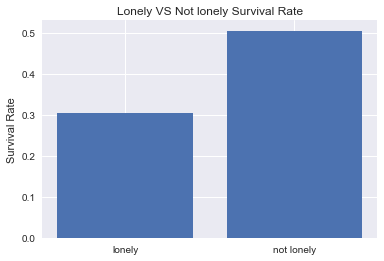

In [207]:
percent_data_by_lonely = [lonely_result[3], not_lonely_result[3]]
labels_lonely = ['lonely', 'not lonely']
plt.title('Lonely VS Not lonely Survival Rate')
plt.ylabel('Survival Rate')
plt.bar(range(len(percent_data_by_lonely)), percent_data_by_lonely, tick_label=labels_lonely)

是否有人陪伴数据分析小结:

1.有人陪伴的乘客其生还率大于无人陪伴的乘客

#### 在前面我们看到女性乘客的生还率较高,那最后我们再结合票的等级,来看一下哪一个舱位等级的女性的生还率较高?

In [216]:
# sex_pclass_df = pd.DataFrame({
#     'Survived':[r['Survived'] for r in passenger_list],
#     'Sex':[r['Sex'] for r in passenger_list],
#     'Pclass':[r['Pclass'] for r in passenger_list]
# })

# ----- The second submission -----
print '----- 性别在各等级舱的总人数 -----'
spc_total = passenger_df.groupby(['Sex','Pclass']).count()['Survived']
print spc_total
print '----- 性别在各等级舱的生还人数 -----'
spc_survived = passenger_df.groupby(['Sex','Pclass']).sum()['Survived']
print spc_survived
print '----- 性别在各等级舱的生还比例 -----'
# def to_percent(x):
#     return round(x*100,2)
# # print spc_survived/spc_total
# spc_survived_percent = (spc_survived/spc_total).apply(to_percent)
spc_survived_percent = passenger_df.groupby(['Sex','Pclass']).mean()['Survived']
print spc_survived_percent


----- 性别在各等级舱的总人数 -----
Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64
----- 性别在各等级舱的生还人数 -----
Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64
----- 性别在各等级舱的生还比例 -----
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


----- before unstack()
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64
----- after unstack()
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


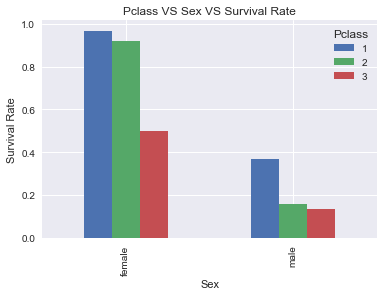

In [217]:
# spc_percent_values = spc_survived_percent.values
# # 获取对应等级舱室的数据
# def get_pclass_data(pclass):
#     result = []
#     result.append(spc_percent_values[pclass-1])
#     result.append(spc_percent_values[pclass+2])
#     return result
# # print get_pclass_data(1)

# sex_x = np.arange(2)
# plt.bar(sex_x + 0.00, get_pclass_data(1), color = 'b', width = 0.25, )
# plt.bar(sex_x + 0.25, get_pclass_data(2), color = 'g', width = 0.25, tick_label=['female - pclass 1 to 3', 'male - pclass 1 to 3'])
# plt.bar(sex_x + 0.50, get_pclass_data(3), color = 'r', width = 0.25, )

# ----- The second submission -----
print '----- before unstack()'
print spc_survived_percent
print '----- after unstack()'
print spc_survived_percent.unstack()

# 使用unstack: 旋转（必须是分层的）索引标签的级别，返回具有新标签级别的DataFrame
# unstack参考 https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
# unstack built-in function还有哪些应用场景了???
spc_survived_percent.unstack().plot(kind='bar')
plt.title('Pclass VS Sex VS Survival Rate')
plt.ylabel('Survival Rate')



性别+舱室等级结合分析的小结:

1.男性和女性在头等舱的生还率都分别高于其它等级舱室

### 此次调查最终结论:

1.我猜测年轻者年富力强，而年纪大者可能行动不便，这是否会导致年轻者比年纪大者的生还率更高? （需要排除掉儿童）.
  
----- _调查结果显示并不存在越年轻生还率越高的情况存在._

2.男性和女性谁的生还率比较高? --维基百科资料显示:泰坦尼克在使用救生艇的时候有下达命令让妇孺先上艇，会不会导致女性以及儿童生还者率较高？

----- _调查结果显示女性和儿童的生还率都较高,而男性的生还率则较低_

3.是一个人出行,还是有朋友/家人陪伴? 是否会影响生还率?

----- _调查结果显示有人陪伴的乘客生还率较高_

4.plcass+sex：联合两个数据调查，查看一下男性在1，2，3等舱各自的生还率， 以及女性在1，2，3等舱各自的生还率

----- _调查结果显示不管是女性还是男性,在一等舱的生还率都高于三等舱的_

5.在得出上面这些结论的同时,我们也要认真的去想一想,这些结论是否有可能是在一些有干扰,有噪音,或者条件不充分的情况下产生的,导致了我们的判断出现偏差?

----- 1) 我认为Cabin数据的缺失对我的生还率分析有很大影响,因为通过该数据,再对照维基百科的舱室分布(从上至下为A,B,C,D,E,F,G),可以了解在船舱中的不同舱室层的生还率(毕竟船舱进水是从最下层开始),而不是粗略的通过1,2,3这三个不同等级的票来统计数据.

----- 2) 维基百科显示泰坦尼克载着1324乘客和892名甲板工作人员, 但此次数据分析使用的数据只有891条记录,并不是全部乘客数据,只占总数的40%,不到一半, 还有我并不清楚这批样本数据是否具有随机性,因此分析结果很可能存在偏差.

----- 3) 我主观意识上一直觉得住在一等舱,买较贵票的乘客,属于富裕阶层,受过良好的教育,在遇到危机的时刻能做出较好的决策,导致生还率较高,这种主观意识可能也会导致分析存在偏差.
